## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [92]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
import TCGame_Env1 as TCGame_Env

In [93]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [94]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [95]:
# Defining a function which will add new Q-values to the Q-dictionary. 
# dictionary Q_dict[x-4-5-3-8-x-x-x-x][(3,8)] = 0
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [96]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        state_key = Q_state(state)
        action = max(Q_dict[state_key],key=Q_dict[state_key].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        available_actions = valid_actions(state)
        random_index = random.randrange(len(available_actions))
        action = available_actions[random_index]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [97]:
# Initialise states to be tracked
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)


In [98]:
def initialise_tracking_states():
    Q_dict = collections.defaultdict(dict)
    States_track = collections.defaultdict(dict)  


In [99]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [100]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [101]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [102]:
#Defining parameters for the experiment

EPISODES = 100000
#EPISODES = 15000000
#STEPS = 2
LR = 0.3                   #learning rate
GAMMA = 0.9


threshold = 2000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

### Q-update loop ---write your code here

#### Training the agent 

In [103]:

start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    env = TicTacToe()      #creating an instance of the environment class
    
    #this initialises the state back to some initial value which is required for every new episode
     
    initial_state = env.state  
    curr_state = env.state     
        
    add_to_dict(curr_state)

    reward = None
    terminal_state = False
    
    # Get next action
    curr_action = epsilon_greedy(curr_state, episode)
    state_key = Q_state(curr_state)
    
    # Get next state and reward from Env
    next_state, reward, terminal_state = env.step(curr_state, curr_action)
    next_state_key = Q_state(next_state)

    
    while terminal_state == False:    #the episode will run only for a few steps and not infinitely
        
        add_to_dict(next_state)

        # UPDATE RULE
        max_next = max(Q_dict[next_state_key],key=Q_dict[next_state_key].get)   #this gets the action corresponding to max q-value of next state

        Q_dict[state_key][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_key][max_next]))) - Q_dict[state_key][curr_action] ) 
        curr_state = next_state
        
        # Get next action
        curr_action = epsilon_greedy(curr_state, episode)
        state_key = Q_state(curr_state)

        # Get next state and reward from Env
        next_state, reward, terminal_state = env.step(curr_state, curr_action)
        next_state_key = Q_state(next_state)
      
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
        
   
elapsed_time = time.time() - start_time
print('Elaspsed time', elapsed_time)
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Elaspsed time 141.71801447868347


#### Check the Q-dictionary

In [104]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0629009189556569,
              (0, 3): -1.0408940197155638,
              (0, 5): -1.115939706294723,
              (0, 7): -1.0810000176888963,
              (0, 9): -1.0000000252724197,
              (1, 1): -1.0982105125418582,
              (1, 3): -1.0032692744546632,
              (1, 5): -1.003564209724156,
              (1, 7): -1.0277830739178753,
              (1, 9): -1.0016092638109189,
              (2, 1): -1.0000161443215647,
              (2, 3): -1.0142105646100443,
              (2, 5): -1.0033008610228118,
              (2, 7): -1.1032651740104609,
              (2, 9): -1.0000006262308543,
              (3, 1): -1.0004738219204627,
              (3, 3): -1.0404748037840297,
              (3, 5): -1.0182514276661532,
              (3, 7): -1.0182836002582014,
              (3, 9): -1.000000000000002,
              (4, 1): -1.0011275838382956,
              (4, 3): -1.000193778687533,
              (4, 5

In [105]:
len(Q_dict)

213122

In [106]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
state_key = 'x-x-x-x-x-x-2-x-7'
max(Q_dict[state_key],key=Q_dict[state_key].get)

(0, 9)

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [107]:
# Write the code for plotting the graphs for state-action pairs tracked

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl
import pandas as pd

fig_handle = plt.figure()


with open('Policy.pkl', 'rb') as handle:
    fig_handle = pl.load(handle)

<Figure size 432x288 with 0 Axes>

In [109]:
df  = pd.DataFrame.from_dict({(i,j): fig_handle[i][j] 
                           for i in fig_handle.keys() 
                           for j in fig_handle[i].keys()},
                       orient='index')
df = df.reset_index()
df.columns=['StateAction', 'Qvalue']
df.head(5)

,StateAction,Qvalue
0,"(x-x-x-x-x-x-x-x-x, (0, 1))",-1.062901
1,"(x-x-x-x-x-x-x-x-x, (0, 3))",-1.040894
2,"(x-x-x-x-x-x-x-x-x, (0, 5))",-1.115940
3,"(x-x-x-x-x-x-x-x-x, (0, 7))",-1.081000
4,"(x-x-x-x-x-x-x-x-x, (0, 9))",-1.000000


In [110]:
df['StateAction'] = df['StateAction'].astype(str)
df[['index', 'State','Action']] = df['StateAction'].str.split('(',expand = True)
df.head(5)

,StateAction,Qvalue,index,State,Action
0,"('x-x-x-x-x-x-x-x-x', (0, 1))",-1.062901,,"'x-x-x-x-x-x-x-x-x',","0, 1))"
1,"('x-x-x-x-x-x-x-x-x', (0, 3))",-1.040894,,"'x-x-x-x-x-x-x-x-x',","0, 3))"
2,"('x-x-x-x-x-x-x-x-x', (0, 5))",-1.115940,,"'x-x-x-x-x-x-x-x-x',","0, 5))"
3,"('x-x-x-x-x-x-x-x-x', (0, 7))",-1.081000,,"'x-x-x-x-x-x-x-x-x',","0, 7))"
4,"('x-x-x-x-x-x-x-x-x', (0, 9))",-1.000000,,"'x-x-x-x-x-x-x-x-x',","0, 9))"


In [111]:
df['Action'] = df['Action'].str.replace(')','')
df['State'] = df['State'].str.replace('\'','').str.replace(',','')
df.drop(['StateAction', 'index'], axis=1, inplace=True)

In [112]:
df.head(10)

,Qvalue,State,Action
0,-1.062901,x-x-x-x-x-x-x-x-x,"0, 1"
1,-1.040894,x-x-x-x-x-x-x-x-x,"0, 3"
2,-1.115940,x-x-x-x-x-x-x-x-x,"0, 5"
3,-1.081000,x-x-x-x-x-x-x-x-x,"0, 7"
4,-1.000000,x-x-x-x-x-x-x-x-x,"0, 9"
5,-1.098211,x-x-x-x-x-x-x-x-x,"1, 1"
6,-1.003269,x-x-x-x-x-x-x-x-x,"1, 3"
7,-1.003564,x-x-x-x-x-x-x-x-x,"1, 5"
8,-1.027783,x-x-x-x-x-x-x-x-x,"1, 7"
9,-1.001609,x-x-x-x-x-x-x-x-x,"1, 9"


In [113]:
state_action = pd.pivot_table(df, values='Qvalue', index='State', columns='Action', aggfunc='max')
state_action = state_action.fillna(0)
state_action.head()

Action,"0, 1","0, 3","0, 5","0, 7","0, 9","1, 1","1, 3","1, 5","1, 7","1, 9",...,"7, 1","7, 3","7, 5","7, 7","7, 9","8, 1","8, 3","8, 5","8, 7","8, 9"
State,,,,,,,,,,,,,,,,,,,,,
1-2-3-4-5-7-x-6-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-2-3-4-5-8-9-6-x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-2-3-4-6-7-9-8-x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-2-3-4-6-8-x-5-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-2-3-4-6-x-9-x-x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


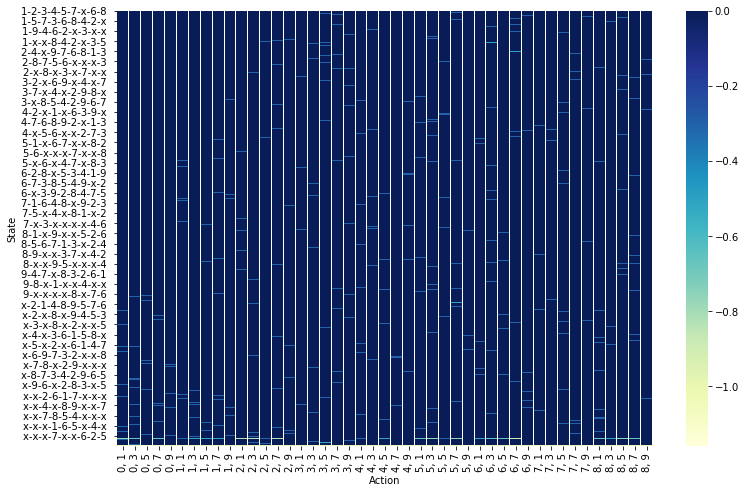

In [114]:
plt.figure(figsize=(12, 8))
# heatmap with a color map of choice
sns.heatmap(state_action, cmap="YlGnBu")
plt.show()

### Epsilon - decay check

In [ ]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

In [ ]:
plt.plot(time, epsilon)
plt.show()